<a href="https://colab.research.google.com/github/ahmadryan/MLTSA_RQudsi/blob/master/HW2_RQudsi/HW2_RQUDSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from numpy import *
pl.rcParams.update({'figure.max_open_warning': 0})
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [3]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
!pwd

Mounted at /content/gdrive
/content


In [5]:
!pwd

/content


In [6]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


<font color=red> Make sure you have kaggle file in your google drive folder before running the next line of the code

In [9]:
ls kaggle*

kaggle.json


In [10]:
!chmod 600 kaggle.json

import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '18', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [0]:
#import os
#if not os.path.exists('rqudsi_data') :
#    os.mkdirs('rqudsi_data')
mkdir rqudsi_data

In [45]:
cd rqudsi_data/

/content/gdrive/My Drive/rqudsi_data


In [46]:
!pwd

/content/gdrive/My Drive/rqudsi_data


In [47]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

 98% 480M/492M [00:04<00:00, 136MB/s]
100% 492M/492M [00:04<00:00, 116MB/s]


In [48]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Streaming output truncated to the last 5000 lines.
  inflating: Stocks/erh.us.txt       
  inflating: Stocks/eri.us.txt       
  inflating: Stocks/eric.us.txt      
  inflating: Stocks/erie.us.txt      
  inflating: Stocks/erii.us.txt      
  inflating: Stocks/erj.us.txt       
  inflating: Stocks/erm.us.txt       
  inflating: Stocks/ern.us.txt       
  inflating: Stocks/eros.us.txt      
  inflating: Stocks/eryp.us.txt      
  inflating: Stocks/es.us.txt        
  inflating: Stocks/esba.us.txt      
  inflating: Stocks/esbk.us.txt      
  inflating: Stocks/esca.us.txt      
  inflating: Stocks/esdi.us.txt      
  inflating: Stocks/esdiw.us.txt     
  inflating: Stocks/ese.us.txt       
  inflating: Stocks/esea.us.txt      
  inflating: Stocks/eses.us.txt      
  inflating: Stocks/esg.us.txt       
  inflating: Stocks/esgd.us.txt      
  inflating: Stocks/esge.us.txt      
  inflating: Stocks/esgf.us.txt      
  inflating: Stocks/esgg.us.txt      
  inflating: Stocks/esgl.us.txt      

In [52]:
from glob import glob

fnames = sort( glob( 'Data/Stocks/*.txt') )

# Print the total number of relevant files found
print( 'Total %s relevant files found' %(len(fnames)))

# Print the name of first 10 files (the ones we are to read)
print( fnames[0:10] )

Total 7195 relevant files found
['Data/Stocks/a.us.txt' 'Data/Stocks/aa.us.txt' 'Data/Stocks/aaap.us.txt'
 'Data/Stocks/aaba.us.txt' 'Data/Stocks/aac.us.txt'
 'Data/Stocks/aal.us.txt' 'Data/Stocks/aamc.us.txt'
 'Data/Stocks/aame.us.txt' 'Data/Stocks/aan.us.txt'
 'Data/Stocks/aaoi.us.txt']


In [53]:
# Read first ten files to a dataframe (df_f)

df_f = pd.DataFrame() # Dummy dataframe
ind=10 # Number of files to be read
for (f,i) in zip( fnames[0:ind], range(ind) ) :

    df = None
    df = pd.read_csv(f)

    ndf = pd.DataFrame({f[12:-4]:df.Close, 'Date':df.Date})
    if(shape(df_f)==(0,0)):
        df_f = ndf.copy()
    else :
        df_f = df_f.merge(ndf, on=['Date', 'Date'])#, suffixes=('', '_'+f[12:-4]))

df_f.set_index("Date", inplace=True)
print(df_f.columns)

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')


In [56]:
print ("shape of the dataset:", df_f.shape)

shape of the dataset: (447, 10)


<font color=red>The next three lines install the latex dependencies of matplotlib so that texts and labels are rendered in the format I want. It takes a bit of time to run those. The work around would be to comment the next two blocks of code and then run the notebook for fast rendering.</font>

In [57]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [0]:
# Set the fontstyle to Times New Roman

font = { 'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 10 }
plt.rc( 'font', **font )
plt.rc('text', usetex=True)

#  data inspection

plot each time series (ts)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


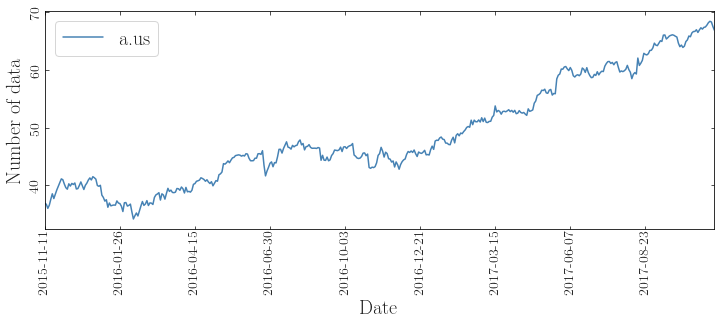

In [59]:
for c in df_f.columns[0:1]:
    fig, ax = pl.subplots(figsize=(12,4))
    #pl.figure(figsize=(10,3))
    df_f.plot(y=c, ax=ax, rot=45, label=c[-7:])
    pl.tick_params(which='major', rotation=90, labelsize=14)
    pl.legend(fontsize=20)
    pl.xlabel('Date', fontsize=20)
    pl.ylabel('Number of data', fontsize=20)

<font color=gray> Time series plots of all datasets

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

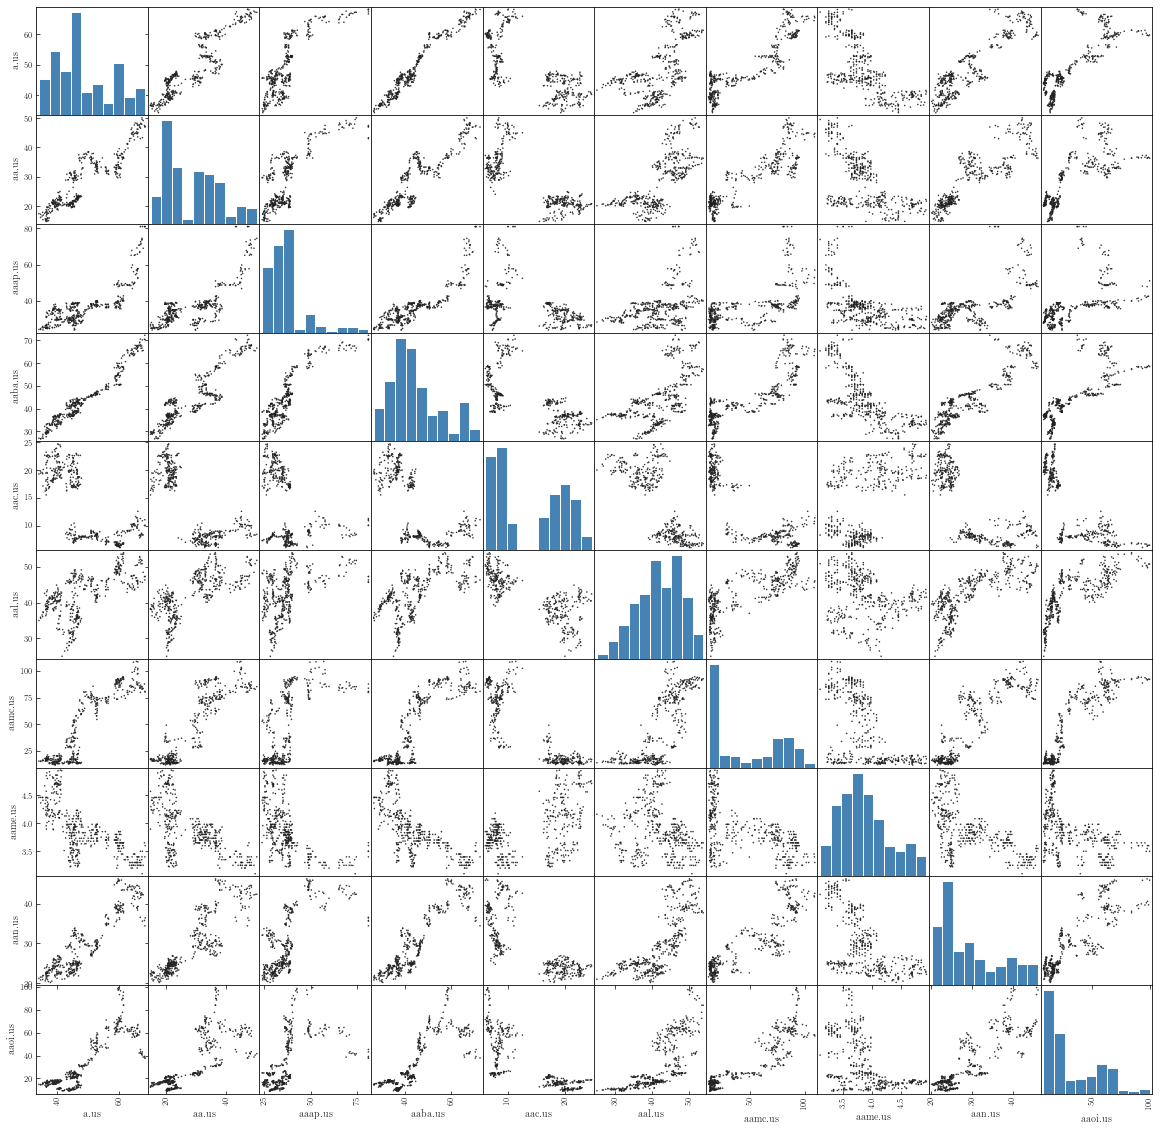

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_f, color="#222222", marker='.', s=10, alpha=0.9, diagonal='hist', figsize=(20,20))
!

<font color=gray> Scatter matrix of all datasets

In [63]:
df_f.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


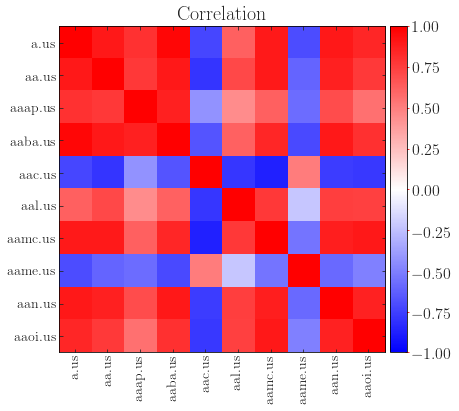

In [64]:
# Used a different colorbar since it is easier to see all three conditions, aka
# 1. High correlation
# 2. High anti-correlation
# 3. Almost no correlation

pl.imshow(df_f.corr(), norm=matplotlib.colors.Normalize(vmin=-1, vmax=1), cmap=matplotlib.pyplot.cm.bwr)
pl.colorbar(pad=0.01).ax.tick_params(labelsize=16, direction='inout', color='r')
pl.title("correlation")
pl.xticks(range(len(df_f.columns)), df_f.columns, rotation=90)
pl.yticks(range(len(df_f.columns)), df_f.columns)
pl.tick_params(which='both', direction='in', labelsize=14)
pl.title( 'Correlation', fontsize=20);

<font color=gray> Plot showing corelation between different files for all the ten datasets. Different shades of red shows positive correlation with darker shade implying stronger correlation, whereas blue colors show the anticorrelation, white color implies almost zero correlation.

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

Compute the p-values for each time series by the unit root test using the adfuller model of statsmodels package, which gives the value based on Augmented Dickey-Fuller method.

In [66]:
# Define the threshold p-value
threshold = 0.05
p_values = {}

#Compute the p value for each column, and display if it is stationary

for col in df_f.columns[:10]:
    p_values[col] = sm.tsa.stattools.adfuller(df_f[col])[1]
    print(col, "is stationary:", p_values[col] < threshold)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


In [67]:
p_values

{'a.us': 0.9711053061077951,
 'aa.us': 0.8615583755460212,
 'aaap.us': 0.9990837483738163,
 'aaba.us': 0.9976818114588439,
 'aac.us': 0.4980216243419859,
 'aal.us': 0.5075488991307308,
 'aamc.us': 0.8176042911117105,
 'aame.us': 0.0395562412801309,
 'aan.us': 0.7303922201105058,
 'aaoi.us': 0.6114808797718178}

## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


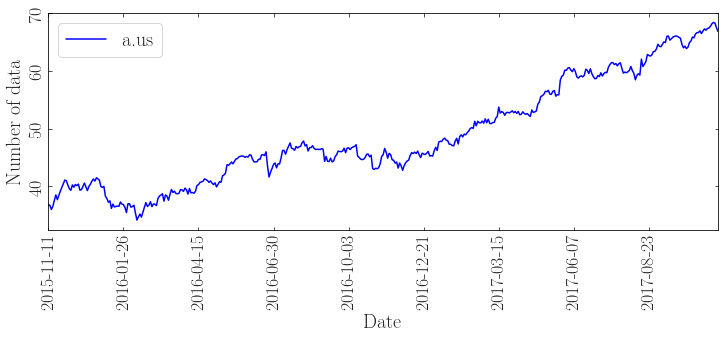

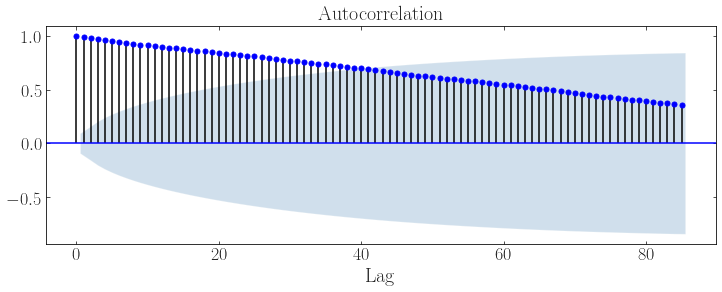

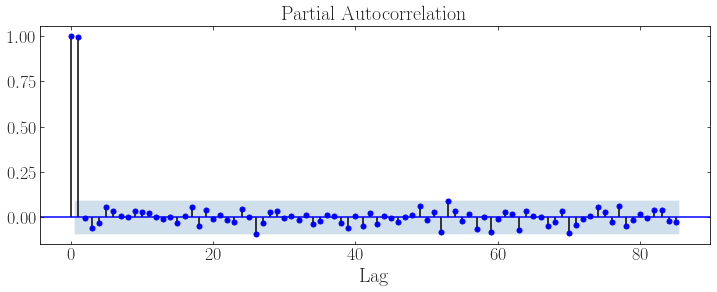

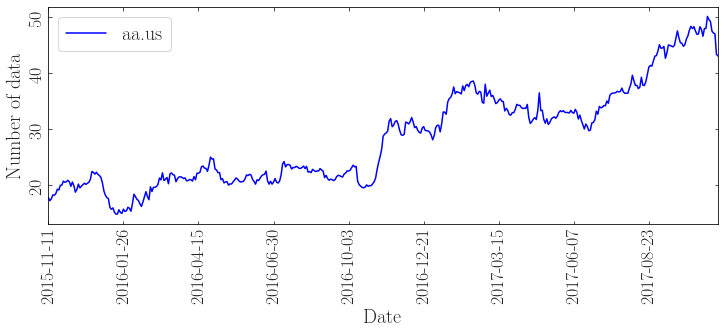

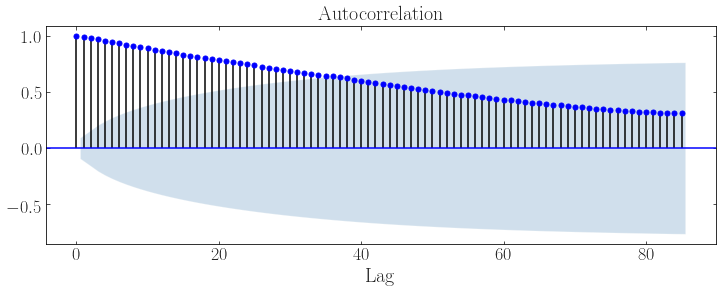

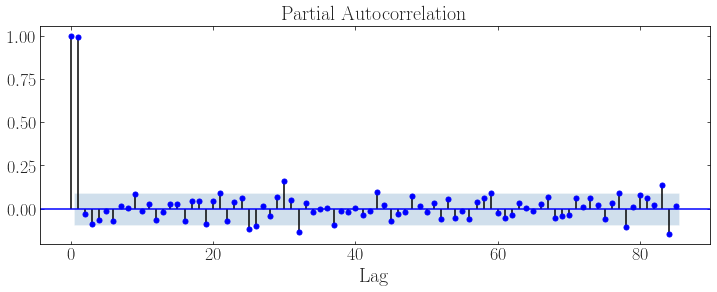

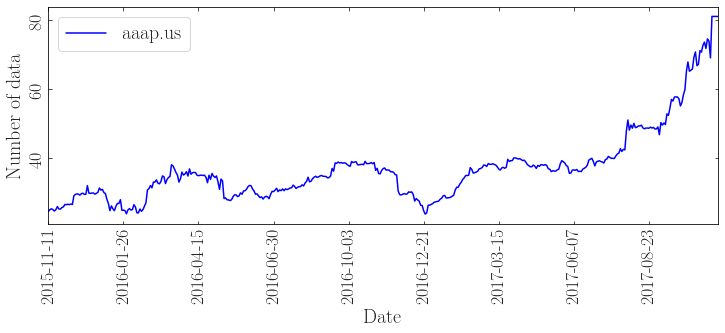

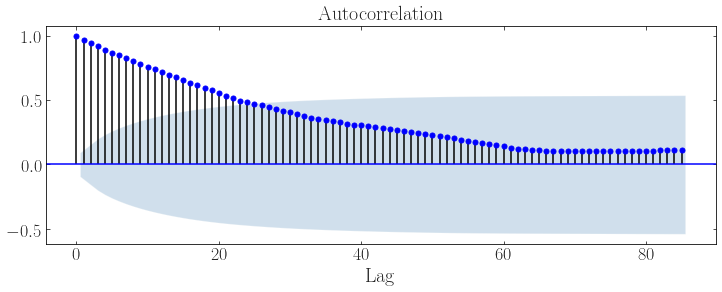

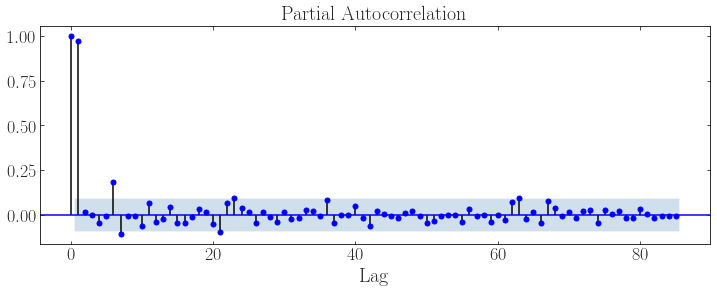

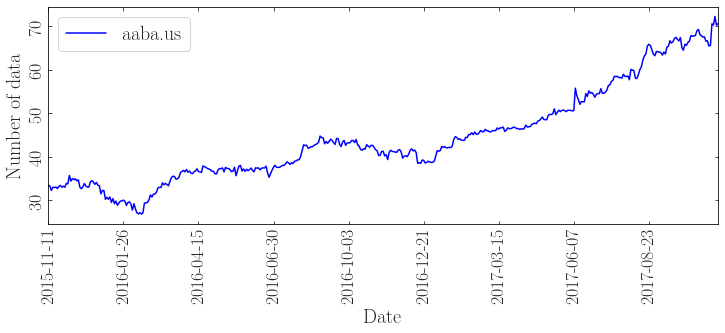

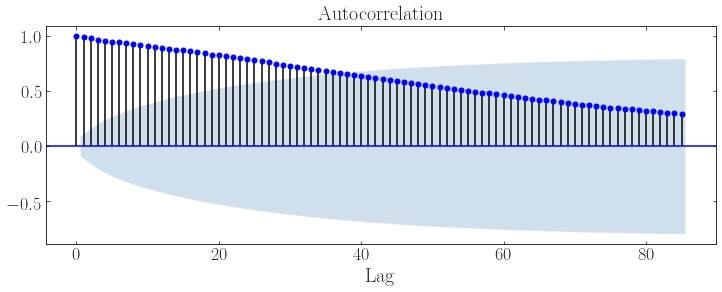

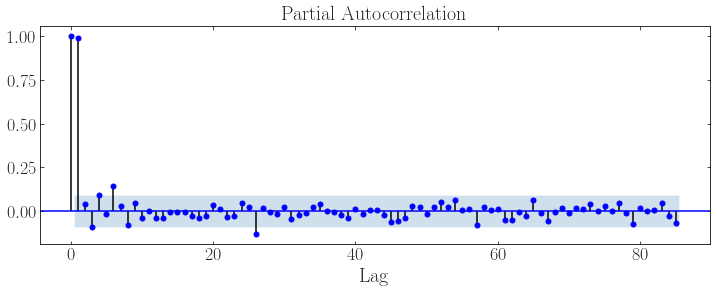

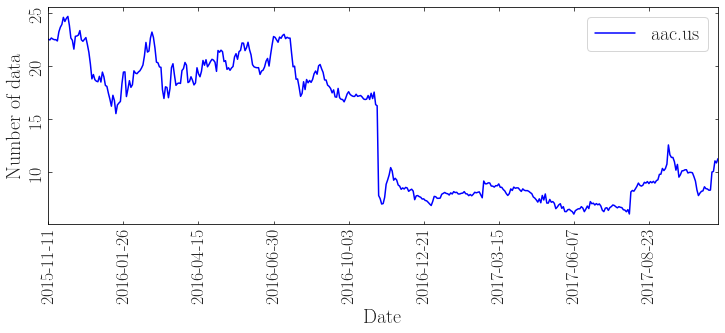

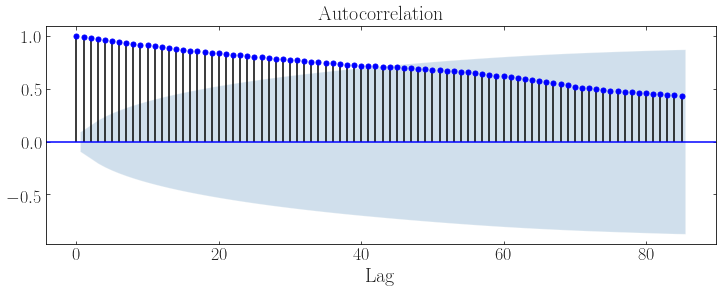

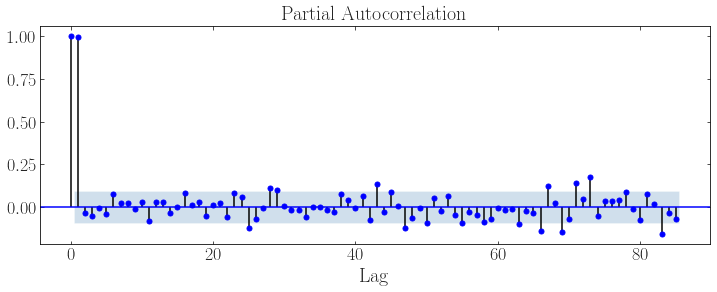

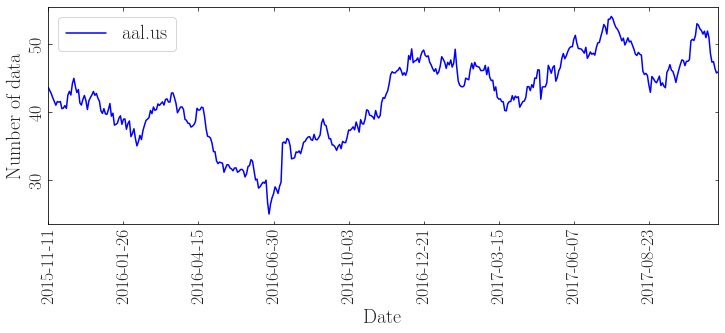

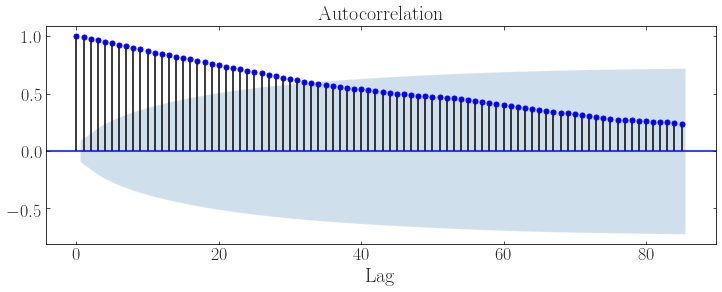

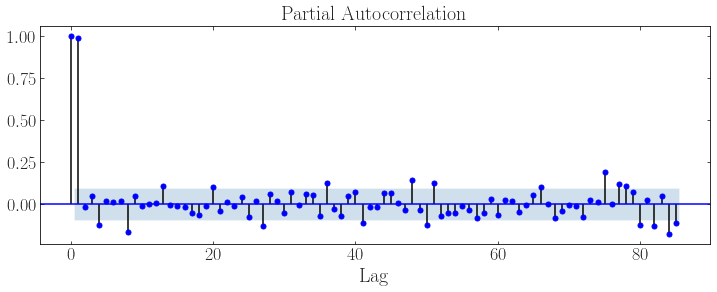

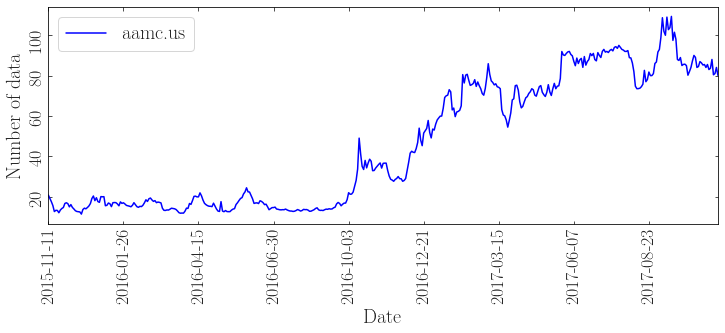

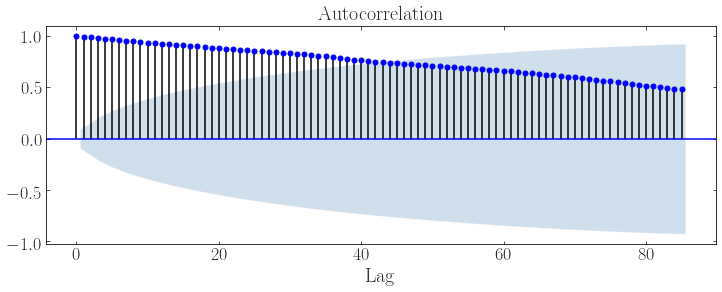

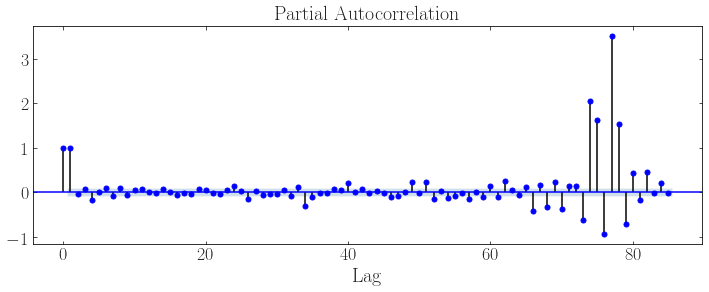

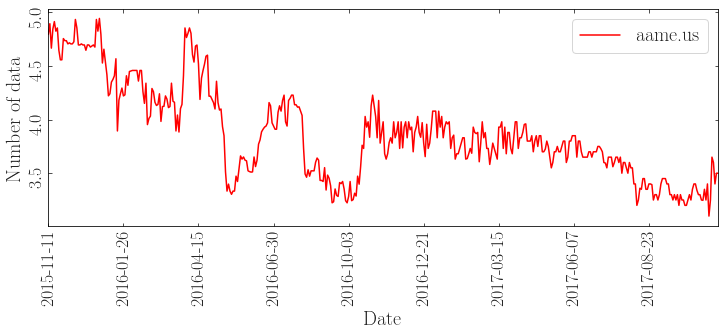

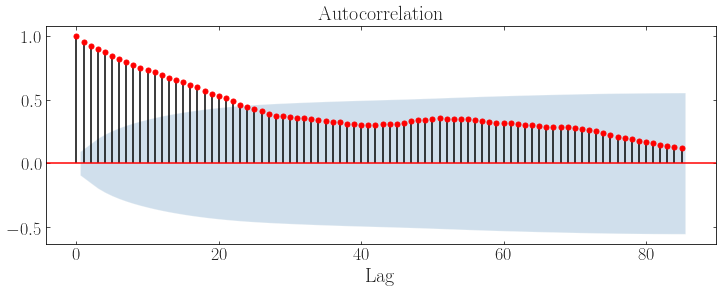

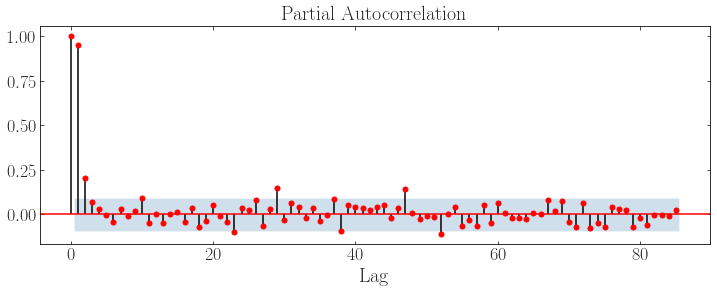

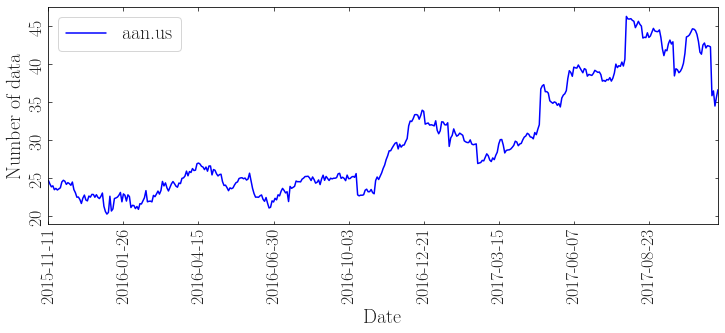

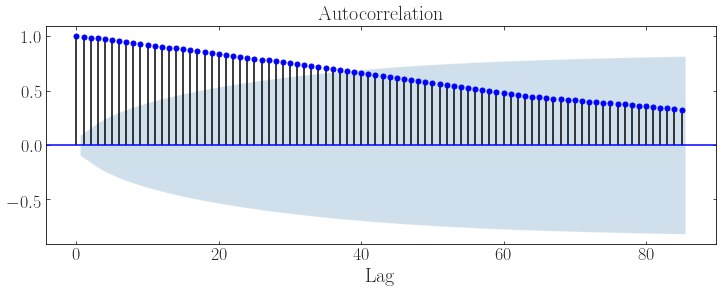

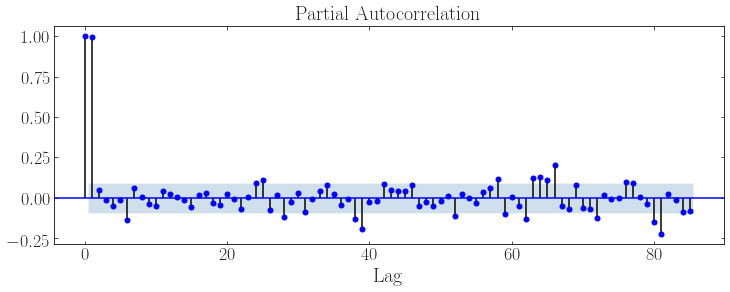

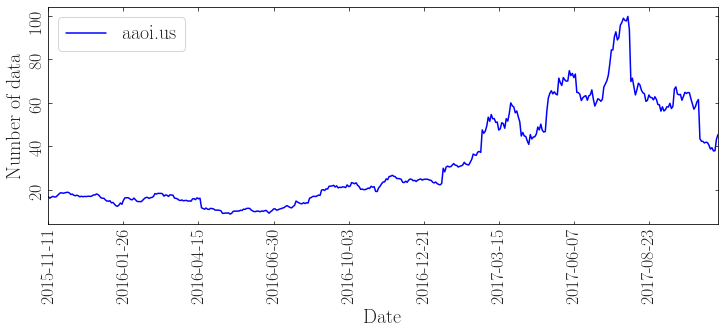

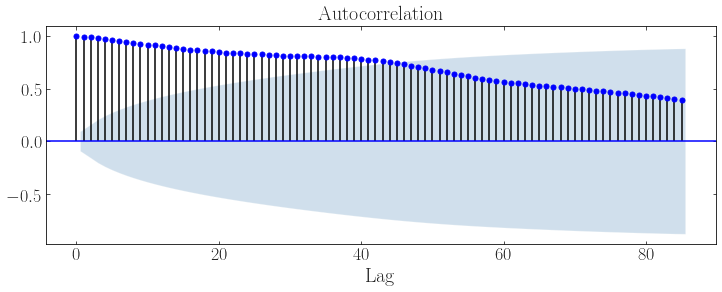

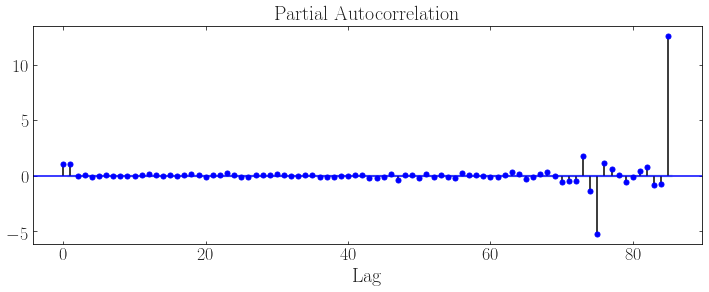

In [70]:
for col in df_f.columns[0:] :
    if(p_values[col] < threshold) :
        color='r'
    else :
        color='b'

    fig, ax = pl.subplots(figsize=(12,4))
    df_f.plot(y=col, ax=ax, color=color, rot=45, label=col)
    pl.tick_params(which='major', rotation=90, labelsize=18)
    pl.legend(fontsize=20)
    pl.xlabel('Date', fontsize=20)
    pl.ylabel('Number of data', fontsize=20)

    fig, ax = pl.subplots(figsize=(12,4))
    fig = sm.graphics.tsa.plot_acf(df_f[col], color=color, lags=85, ax=ax)
    pl.tick_params(which='major', rotation=0, labelsize=18)
    pl.xlabel('Lag', fontsize=20)
    pl.title('Autocorrelation', fontsize=20)

    fig, ax = pl.subplots(figsize=(12,4))
    fig = sm.graphics.tsa.plot_pacf(df_f[col], color=color, lags=85, ax=ax)
    pl.tick_params(which='major', rotation=0, labelsize=18)
    pl.xlabel('Lag', fontsize=20)
    pl.title('Partial Autocorrelation', fontsize=20)

<font color=gray> Plot for partial and full autocorrelation ffor the first 10 datasets. All the stationary plots are in red color, and non-stationary ones are in blue color. A p-value of 0.05 was used as a threshold to decide the stationarity of each data set.

In [0]:
pl.close('all')

# Fit one of the stationary time series with ARMA

In [74]:
aic_aame = zeros((5,5))
aic_aame[:] = NaN

for i in range(5) :
    for j in range(5) :
        try :
            aic_aame[i,j] = sm.tsa.ARMA(df_f[['aame.us']], (i,j)).fit(disp=False).aic
        except :
            pass

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [75]:
print("best parameters: \n p = %s \n q = %s" %(np.where(aic_aame == nanmin(aic_aame))[0][0], np.where(aic_aame == nanmin(aic_aame))[1][0]) )

best parameters: 
 p = 1 
 q = 1


In [0]:
x_ind = np.where(aic_aame == nanmin(aic_aame))[0][0]
y_ind = np.where(aic_aame == nanmin(aic_aame))[1][0]

<font color=magenta>**sm.tsa.ARMA(dataframe, ARMA(p,q)).fit(disp, trend)**:<font color=black>Fits ARMA(p,q) model using exact maximum likelihood via Kalman filter.</font>

In [78]:
#example of model output
arma_mod_11_c = sm.tsa.ARMA(df_f[['aame.us']], (1,1)).fit(disp=False, trend='c')
arma_mod_11_nc = sm.tsa.ARMA(df_f[['aame.us']], (1,1)).fit(disp=False, trend='nc')
#print(arma_mod_11.params)
#(df_f[col], (3,1), dates=df_f.index ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
print(arma_mod_11_c.summary())
print(arma_mod_11_nc.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        01:11:27   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     

## 4. Predict the in-set and the future values

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


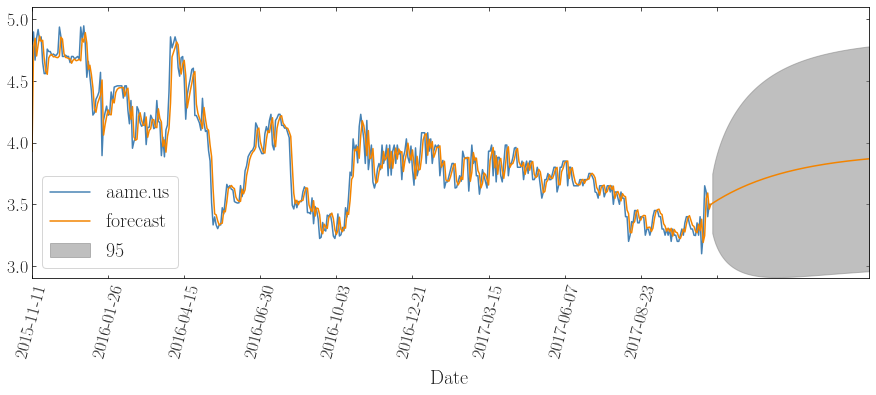

In [79]:
ax = df_f[['aame.us']].plot(figsize=(15,5))
arma_mod_11_c.plot_predict(end=550, plot_insample=False, ax=ax);
pl.ylim(2.9, 5.1)
pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=3, fontsize=20)

<font color=gray> Plot for **aame.us** (a stationary case) dataset with forecast and 95% confidence interval, with a constant value, and for optimal parameter (1,1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


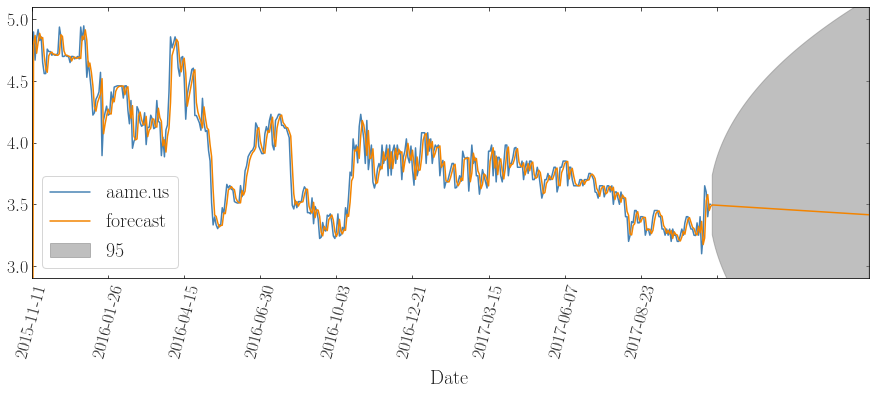

In [80]:
# Plotting without contant
ax = df_f[['aame.us']].plot(figsize=(15,5))
arma_mod_11_nc.plot_predict(end=550, plot_insample=False, ax=ax);
pl.ylim(2.9, 5.1)
pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=3, fontsize=20)

<font color=gray> Plot for **aame.us** (a stationary case) dataset with forecast and 95% confidence interval, without a constant value, and for optimal parameter (1,1)

# 3.5 what are the coefficients of the best fit model? what do they mean? 

<font color=blue> Coefficients of the best fit models are: <\font>

<font color=black> constant = 3.9375

Auto Regressive (L1) = 0.9811

Moving Average (L1) = -0.2706

<font color=blue> Since it is a (1,1) ARMA model, the model equation can be written as:

$\color{red}{y(t) = \mu + \epsilon_t + a_1 y(t-1) + \theta_1 \epsilon_{t-1}}$

where $\mu$ is the contant, $a_1$ is the coefficient corresponding to the coefficinet of auto regressive part of the model and $\theta_1$ corresponds to coeeficient of moving average part.</font>

<font color=blue> The value of cofficients in ARMA model tell you how strongly/wekaly does the value of the quantity at any time **t** depends on previous/past quantities, ranging from (t-1) to (t-p), where t **p** is the number of time-steps, and **q** tells you the number of past values on which the current value depend.
The constant value (3.9275) gives you average value of the whole time series. </font>

In [85]:
# Print the cross-correlation table
abs(df_f.corr())

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,0.721867,0.621041,0.897263,0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,0.791137,0.713229,0.893952,0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,0.423021,0.451520,0.621329,0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,0.670578,0.612989,0.849972,0.709023,0.903785,0.809059
aac.us,0.721867,0.791137,0.423021,0.670578,1.000000,0.785248,0.868936,0.510986,0.765267,0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,0.785248,1.000000,0.780517,0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,0.868936,0.780517,1.000000,0.544740,0.881631,0.904166
aame.us,0.699609,0.606774,0.573976,0.709023,0.510986,0.219258,0.544740,1.000000,0.585002,0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,0.765267,0.756808,0.881631,0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,0.780147,0.746505,0.904166,0.496371,0.860847,1.000000


#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [86]:
# Find the column names for which the correlation value is least.
## Make sure to exclude the columns which are stationary

dfn = df_f.drop(columns='aame.us')

x_ind = where( abs(dfn.corr()) == min( abs(dfn.corr()).min() ))[0][0]
y_ind = where( abs(dfn.corr()) == min( abs(dfn.corr()).min() ))[0][1]

col1 = dfn.columns[x_ind]
col2 = dfn.columns[y_ind]
print( col1, col2)

aaap.us aac.us


In [88]:
cols = [col1, col2]
p = 5
q = 5
d = 5
aic_ns = zeros((2, p, q, d))
aic_ns[:] = NaN

for (ind, col) in enumerate(cols) :
    for i in range(p) :
        for j in range(q) :
                for k in range(d) :
                    try :
                        aic_ns[ind, i,j,k] = sm.tsa.ARIMA(df_f[[col]], (i,j,k)).fit(disp=False).aic
                    except :
                        print('Code skipped for %s column and (p,d,q) values of (%s, %s, %s)' %(col, i, j, k))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (0, 0, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (0, 2, 2)
Code skipped for aaap.us column and (p,d,q) values of (0, 2, 3)
Code skipped for aaap.us column and (p,d,q) values of (0, 2, 4)
Code skipped for aaap.us column and (p,d,q) values of (0, 3, 0)
Code skipped for aaap.us column and (p,d,q) values of (0, 3, 1)
Code skipped for aaap.us column and (p,d,q) values of (0, 3, 2)
Code skipped for aaap.us column and (p,d,q) values of (0, 3, 3)
Code skipped for aaap.us column and (p,d,q) values of (0, 3, 4)
Code skipped for aaap.us column and (p,d,q) values of (0, 4, 0)
Code skipped for aaap.us column and (p,d,q) values of (0, 4, 1)
Code skipped for aaap.us column and (p,d,q) values of (0, 4, 2)
Code skipped for aaap.us column and (p,d,q) values of (0, 4, 3)
Code skipped for aaap.us column and (p,d,q) values of (0, 4, 4)
Code skipped for aaap.us column and (p,d,q) values of (1, 0, 1)
Code skipped for aaap.us column and (p,d,q) values of (1, 0, 2)
Code skipped for aaap.us column and (p,d

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (1, 1, 2)
Code skipped for aaap.us column and (p,d,q) values of (1, 1, 3)
Code skipped for aaap.us column and (p,d,q) values of (1, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (1, 2, 2)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Code skipped for aaap.us column and (p,d,q) values of (1, 3, 0)
Code skipped for aaap.us column and (p,d,q) values of (1, 3, 1)
Code skipped for aaap.us column and (p,d,q) values of (1, 3, 2)
Code skipped for aaap.us column and (p,d,q) values of (1, 3, 3)
Code skipped for aaap.us column and (p,d,q) values of (1, 3, 4)
Code skipped for aaap.us column and (p,d,q) values of (1, 4, 0)
Code skipped for aaap.us column and (p,d,q) values of (1, 4, 1)
Code skipped for aaap.us column and (p,d,q) values of (1, 4, 2)
Code skipped for aaap.us column and (p,d,q) values of (1, 4, 3)
Code skipped for aaap.us column and (p,d,q) values of (1, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

Code skipped for aaap.us column and (p,d,q) values of (2, 0, 1)
Code skipped for aaap.us column and (p,d,q) values of (2, 0, 2)
Code skipped for aaap.us column and (p,d,q) values of (2, 0, 3)
Code skipped for aaap.us column and (p,d,q) values of (2, 0, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (2, 1, 3)
Code skipped for aaap.us column and (p,d,q) values of (2, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (2, 3, 0)
Code skipped for aaap.us column and (p,d,q) values of (2, 3, 1)
Code skipped for aaap.us column and (p,d,q) values of (2, 3, 2)
Code skipped for aaap.us column and (p,d,q) values of (2, 3, 3)
Code skipped for aaap.us column and (p,d,q) values of (2, 3, 4)
Code skipped for aaap.us column and (p,d,q) values of (2, 4, 0)
Code skipped for aaap.us column and (p,d,q) values of (2, 4, 1)
Code skipped for aaap.us column and (p,d,q) values of (2, 4, 2)
Code skipped for aaap.us column and (p,d,q) values of (2, 4, 3)
Code skipped for aaap.us column and (p,d,q) values of (2, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (3, 0, 1)
Code skipped for aaap.us column and (p,d,q) values of (3, 0, 2)
Code skipped for aaap.us column and (p,d,q) values of (3, 0, 3)
Code skipped for aaap.us column and (p,d,q) values of (3, 0, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (3, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (3, 3, 0)
Code skipped for aaap.us column and (p,d,q) values of (3, 3, 1)
Code skipped for aaap.us column and (p,d,q) values of (3, 3, 2)
Code skipped for aaap.us column and (p,d,q) values of (3, 3, 3)
Code skipped for aaap.us column and (p,d,q) values of (3, 3, 4)
Code skipped for aaap.us column and (p,d,q) values of (3, 4, 0)
Code skipped for aaap.us column and (p,d,q) values of (3, 4, 1)
Code skipped for aaap.us column and (p,d,q) values of (3, 4, 2)
Code skipped for aaap.us column and (p,d,q) values of (3, 4, 3)
Code skipped for aaap.us column and (p,d,q) values of (3, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (4, 0, 1)
Code skipped for aaap.us column and (p,d,q) values of (4, 0, 2)
Code skipped for aaap.us column and (p,d,q) values of (4, 0, 3)
Code skipped for aaap.us column and (p,d,q) values of (4, 0, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aaap.us column and (p,d,q) values of (4, 2, 3)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr

Code skipped for aaap.us column and (p,d,q) values of (4, 3, 0)
Code skipped for aaap.us column and (p,d,q) values of (4, 3, 1)
Code skipped for aaap.us column and (p,d,q) values of (4, 3, 2)
Code skipped for aaap.us column and (p,d,q) values of (4, 3, 3)
Code skipped for aaap.us column and (p,d,q) values of (4, 3, 4)
Code skipped for aaap.us column and (p,d,q) values of (4, 4, 0)
Code skipped for aaap.us column and (p,d,q) values of (4, 4, 1)
Code skipped for aaap.us column and (p,d,q) values of (4, 4, 2)
Code skipped for aaap.us column and (p,d,q) values of (4, 4, 3)
Code skipped for aaap.us column and (p,d,q) values of (4, 4, 4)
Code skipped for aac.us column and (p,d,q) values of (0, 0, 2)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (0, 2, 3)
Code skipped for aac.us column and (p,d,q) values of (0, 2, 4)
Code skipped for aac.us column and (p,d,q) values of (0, 3, 0)
Code skipped for aac.us column and (p,d,q) values of (0, 3, 1)
Code skipped for aac.us column and (p,d,q) values of (0, 3, 2)
Code skipped for aac.us column and (p,d,q) values of (0, 3, 3)
Code skipped for aac.us column and (p,d,q) values of (0, 3, 4)
Code skipped for aac.us column and (p,d,q) values of (0, 4, 0)
Code skipped for aac.us column and (p,d,q) values of (0, 4, 1)
Code skipped for aac.us column and (p,d,q) values of (0, 4, 2)
Code skipped for aac.us column and (p,d,q) values of (0, 4, 3)
Code skipped for aac.us column and (p,d,q) values of (0, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (1, 1, 1)
Code skipped for aac.us column and (p,d,q) values of (1, 1, 2)
Code skipped for aac.us column and (p,d,q) values of (1, 1, 3)
Code skipped for aac.us column and (p,d,q) values of (1, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (1, 3, 0)
Code skipped for aac.us column and (p,d,q) values of (1, 3, 1)
Code skipped for aac.us column and (p,d,q) values of (1, 3, 2)
Code skipped for aac.us column and (p,d,q) values of (1, 3, 3)
Code skipped for aac.us column and (p,d,q) values of (1, 3, 4)
Code skipped for aac.us column and (p,d,q) values of (1, 4, 0)
Code skipped for aac.us column and (p,d,q) values of (1, 4, 1)
Code skipped for aac.us column and (p,d,q) values of (1, 4, 2)
Code skipped for aac.us column and (p,d,q) values of (1, 4, 3)
Code skipped for aac.us column and (p,d,q) values of (1, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (2, 1, 3)
Code skipped for aac.us column and (p,d,q) values of (2, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (2, 3, 0)
Code skipped for aac.us column and (p,d,q) values of (2, 3, 1)
Code skipped for aac.us column and (p,d,q) values of (2, 3, 2)
Code skipped for aac.us column and (p,d,q) values of (2, 3, 3)
Code skipped for aac.us column and (p,d,q) values of (2, 3, 4)
Code skipped for aac.us column and (p,d,q) values of (2, 4, 0)
Code skipped for aac.us column and (p,d,q) values of (2, 4, 1)
Code skipped for aac.us column and (p,d,q) values of (2, 4, 2)
Code skipped for aac.us column and (p,d,q) values of (2, 4, 3)
Code skipped for aac.us column and (p,d,q) values of (2, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (3, 1, 3)
Code skipped for aac.us column and (p,d,q) values of (3, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (3, 3, 0)
Code skipped for aac.us column and (p,d,q) values of (3, 3, 1)
Code skipped for aac.us column and (p,d,q) values of (3, 3, 2)
Code skipped for aac.us column and (p,d,q) values of (3, 3, 3)
Code skipped for aac.us column and (p,d,q) values of (3, 3, 4)
Code skipped for aac.us column and (p,d,q) values of (3, 4, 0)
Code skipped for aac.us column and (p,d,q) values of (3, 4, 1)
Code skipped for aac.us column and (p,d,q) values of (3, 4, 2)
Code skipped for aac.us column and (p,d,q) values of (3, 4, 3)
Code skipped for aac.us column and (p,d,q) values of (3, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Code skipped for aac.us column and (p,d,q) values of (4, 1, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr

Code skipped for aac.us column and (p,d,q) values of (4, 3, 0)
Code skipped for aac.us column and (p,d,q) values of (4, 3, 1)
Code skipped for aac.us column and (p,d,q) values of (4, 3, 2)
Code skipped for aac.us column and (p,d,q) values of (4, 3, 3)
Code skipped for aac.us column and (p,d,q) values of (4, 3, 4)
Code skipped for aac.us column and (p,d,q) values of (4, 4, 0)
Code skipped for aac.us column and (p,d,q) values of (4, 4, 1)
Code skipped for aac.us column and (p,d,q) values of (4, 4, 2)
Code skipped for aac.us column and (p,d,q) values of (4, 4, 3)
Code skipped for aac.us column and (p,d,q) values of (4, 4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [94]:
# Print the best value of paramters for each files

p0,q0,d0 = where(aic_ns[0] == nanmin(aic_ns[0]))
p1,q1,d1 = where(aic_ns[1] == nanmin(aic_ns[1]))
print('For %s, the best parameters are \n p=%s \n q=%s \n d=%s' %(cols[0], p0[0],q0[0],d0[0]))
print('For %s, the best parameters are \n p=%s\n q=%s \n d=%s' %(cols[1],p1[0],q1[0],d1[0]))

For aaap.us, the best parameters are 
 p=2 
 q=2 
 d=4
For aac.us, the best parameters are 
 p=4
 q=1 
 d=3


In [96]:
arima_mod_0_c = sm.tsa.ARIMA(df_f[[cols[0]]], (p0[0],q0[0],d0[0])).fit(disp=False, trend='c')
print(arima_mod_0_c.summary())

arima_mod_1_c = sm.tsa.ARIMA(df_f[[cols[1]]], (p1[0],q1[0],d1[0])).fit(disp=False, trend='c')
print(arima_mod_1_c.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D2.aaap.us   No. Observations:                  445
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -714.719
Method:                       css-mle   S.D. of innovations              1.200
Date:                Thu, 27 Feb 2020   AIC                           1445.438
Time:                        01:40:51   BIC                           1478.222
Sample:                             2   HQIC                          1458.365
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0014      0.001      0.993      0.321      -0.001       0.004
ar.L1.D2.aaap.us    -1.2922      0.059    -21.753      0.000      -1.409      -1.176
ar.L2.D2.aaap.us    -0.9578 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aac.us   No. Observations:                  446
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -449.224
Method:                       css-mle   S.D. of innovations              0.659
Date:                Thu, 27 Feb 2020   AIC                            916.449
Time:                        01:40:53   BIC                            953.351
Sample:                             1   HQIC                           930.999
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0249      0.034     -0.724      0.469      -0.092       0.043
ar.L1.D.aac.us    -0.0233      0.112     -0.208      0.835      -0.243       0.196
ar.L2.D.aac.us    -0.2200      0.076

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


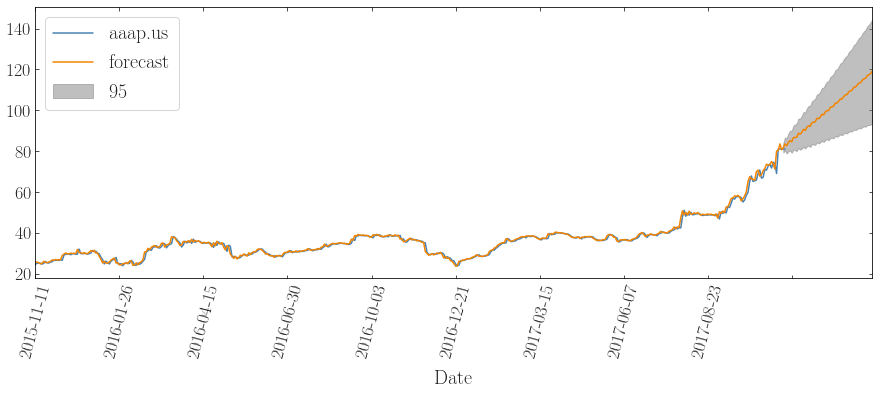

In [104]:
ax = df_f[[col1]].plot(figsize=(15,5))
arima_mod_0_c.plot_predict(end=500, plot_insample=False, dynamic=False, alpha=0.05, ax=ax)
#arima_mod_0_c.plot_predict(end=500, plot_insample=False, alpha=0.3, ax=ax)

pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=2, fontsize=20)

<font color=gray> Plot for **aaap.us** dataset with forcast and 95% confidence interval for the optimal paramters (2,2,4)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


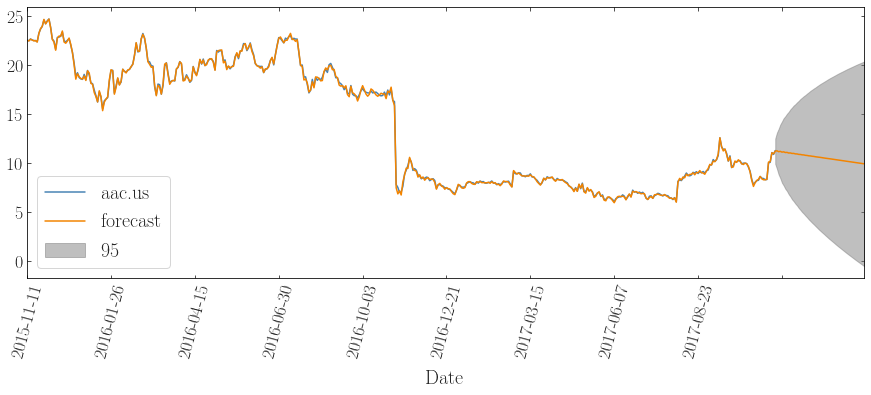

In [105]:
ax = df_f[[col2]].plot(figsize=(15,5))
arima_mod_1_c.plot_predict(end=500, plot_insample=False, dynamic=False, alpha=0.05, ax=ax)
#arima_mod_1_c.plot_predict(end=500, plot_insample=False, alpha=0.3, ax=ax)

pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=3, fontsize=20)

<font color=gray> Plot for **aac.us** dataset with forcast and 95% confidence interval using the optimal parameters (4,1,3)

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [128]:
arima_mod_alt = sm.tsa.ARIMA(df_f[[cols[1]]], (4,2,3)).fit(disp=False, trend='c')
print(arima_mod_alt.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:              D2.aac.us   No. Observations:                  445
Model:                 ARIMA(4, 2, 3)   Log Likelihood                -456.143
Method:                       css-mle   S.D. of innovations              0.670
Date:                Thu, 27 Feb 2020   AIC                            930.285
Time:                        01:57:28   BIC                            967.168
Sample:                             2   HQIC                           944.829
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000      0.685      0.494      -0.000       0.001
ar.L1.D2.aac.us    -0.9960      0.645     -1.544      0.123      -2.260       0.268
ar.L2.D2.aac.us    -0.1795      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


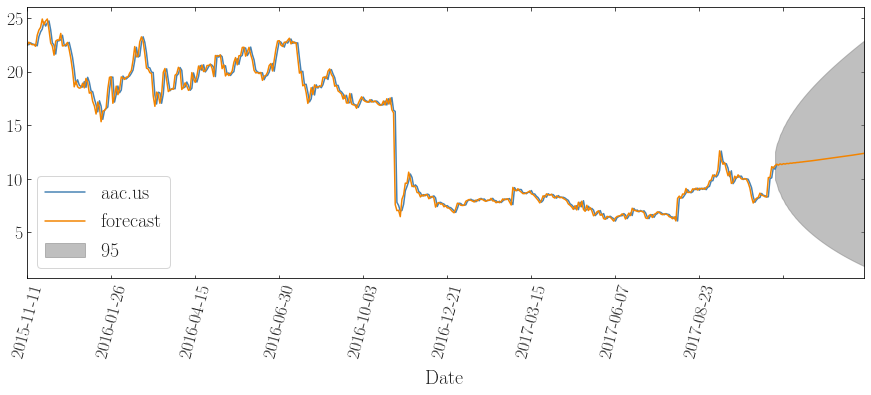

In [131]:
ax = df_f[[cols[1]]].plot(figsize=(15,5))
arima_mod_alt.plot_predict(end=500, plot_insample=False, ax=ax)
#pl.ylim(2.9, 5.1)
pl.tick_params(which='major', axis='x', rotation=75, labelsize=18)
pl.tick_params(which='major', axis='y', rotation=0, labelsize=18)
pl.xlabel('Date', fontsize=20, labelpad=10)
pl.legend(loc=3, fontsize=20)

<font color=gray> Plot for **aac.us** data, with forecast and 95% confidence level using sub-optimal parameters (4,2,3). Note that in this case, the error is slightly higher since the two lines for forecast and actual data are seperated by a larger distance than for the optimal case (see previous figure)

In [136]:
print(arima_mod_1_c.summary())
print(arima_mod_alt.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.aac.us   No. Observations:                  446
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -449.224
Method:                       css-mle   S.D. of innovations              0.659
Date:                Thu, 27 Feb 2020   AIC                            916.449
Time:                        02:16:28   BIC                            953.351
Sample:                             1   HQIC                           930.999
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0249      0.034     -0.724      0.469      -0.092       0.043
ar.L1.D.aac.us    -0.0233      0.112     -0.208      0.835      -0.243       0.196
ar.L2.D.aac.us    -0.2200      0.076

<font color=blue> Optimal parameters for the file **aac.us** are (4,1,3) with an AIC value of 916.449. For the same dataset, another model was run with a different integration time thus parameter values were (4,2,3) and AIC value was 930.285, which is understandable, since we had already concluded that (4,1,3) was the most efficient set of parameter.

<font color=blue> For the most optimal case, for **AR** part, the first three coefficients are negative, and the model has strong  dependency (negative) on the 3rd data point from the current time. For the **MA** part, the values are all positive with the strongest positive dependence on the 3rd index.

<font color=blue> For the alternate run, the value of first coefficient for **AR** is -0.99960, thus implying almost complete dependence on the previous occurence, and not so much on the occurances which happened at time interval of greater than one. The **MA** part has the strongest dependency on the second component having a value of -0.7816.